# Project exploration and stuff

In [30]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv, find_dotenv
import json
import gcsfs

In [12]:
def to_readable_datetime(x):
    from datetime import datetime
    return datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

In [2]:
file_name = "../keys.json"
with open(file_name, "r") as key_file:
    keys = json.load(key_file)

In [3]:
cc_apikey =  keys["CRYPTOCOMPARE_API_KEY"]

cc_url = "https://min-api.cryptocompare.com/data/"
cc_hist_url = "v2/histoday?"
cc_headers = {'authorization' : cc_apikey}

token = "BTC"
dollar = "USD"

In [15]:
cc_hist_params = {"e":"Coinbase",
                  "fsym":token,
                  "tsym":dollar,
                  #"toTs": 1464739200,
                  "limit":15}

In [16]:
hist_response = requests.get(cc_url+cc_hist_url, headers = cc_headers, params = cc_hist_params)

In [17]:
hist_response.json()["Data"]

{'Aggregated': False,
 'TimeFrom': 1637020800,
 'TimeTo': 1638316800,
 'Data': [{'time': 1637020800,
   'close': 60107.98,
   'high': 63624.6,
   'low': 58638,
   'open': 63624.59,
   'volumefrom': 24904.46,
   'volumeto': 1514727205.98,
   'conversionType': 'force_direct',
   'conversionSymbol': ''},
  {'time': 1637107200,
   'close': 60351.51,
   'high': 60824.38,
   'low': 58380,
   'open': 60107.98,
   'volumefrom': 20904.28,
   'volumeto': 1250584059.67,
   'conversionType': 'force_direct',
   'conversionSymbol': ''},
  {'time': 1637193600,
   'close': 56898,
   'high': 60977.21,
   'low': 56514.13,
   'open': 60351.51,
   'volumefrom': 26742.24,
   'volumeto': 1566051095.73,
   'conversionType': 'force_direct',
   'conversionSymbol': ''},
  {'time': 1637280000,
   'close': 58122.16,
   'high': 58412.12,
   'low': 55625,
   'open': 56898,
   'volumefrom': 18548.35,
   'volumeto': 1062148414.75,
   'conversionType': 'force_direct',
   'conversionSymbol': ''},
  {'time': 1637366400,

In [18]:
coinbase_btc_hist = pd.DataFrame(hist_response.json()["Data"]["Data"])

In [19]:
coinbase_btc_hist

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol
0,1637020800,60107.98,63624.60,58638.00,63624.59,24904.46,1.514727e+09,force_direct,
1,1637107200,60351.51,60824.38,58380.00,60107.98,20904.28,1.250584e+09,force_direct,
2,1637193600,56898.00,60977.21,56514.13,60351.51,26742.24,1.566051e+09,force_direct,
3,1637280000,58122.16,58412.12,55625.00,56898.00,18548.35,1.062148e+09,force_direct,
4,1637366400,59760.76,59900.00,57423.35,58122.16,7582.40,4.448062e+08,force_direct,
5,1637452800,58671.21,60070.00,58509.69,59760.76,6660.78,3.945169e+08,force_direct,
6,1637539200,56280.81,59526.51,55641.03,58671.21,15882.38,9.091499e+08,force_direct,
7,1637625600,57566.85,57886.03,55377.00,56280.81,14013.01,7.982513e+08,force_direct,
8,1637712000,57162.66,57607.97,55875.01,57566.85,12507.17,7.089274e+08,force_direct,
9,1637798400,58987.27,59445.99,57037.04,57162.66,10666.45,6.221766e+08,force_direct,


In [20]:
coinbase_btc_hist_3 = coinbase_btc_hist_2[coinbase_btc_hist_2["volumefrom"] != 0]

NameError: name 'coinbase_btc_hist_2' is not defined

In [65]:
coinbase_btc_big = coinbase_btc_hist_3.append(coinbase_btc_hist, ignore_index=True)[["time","close","high","low","open","volumeto","volumefrom"]]

In [56]:
coinbase_btc_hist_2["time"] = coinbase_btc_hist_2["time"].map(to_readable_datetime)
coinbase_btc_hist_2["time"] = pd.to_datetime(coinbase_btc_hist_2["time"])

In [21]:
coinbase_btc_hist["time"] = coinbase_btc_hist["time"].map(to_readable_datetime)
coinbase_btc_hist["time"] = pd.to_datetime(coinbase_btc_hist["time"])

In [22]:
coinbase_btc_hist

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol
0,2021-11-16,60107.98,63624.60,58638.00,63624.59,24904.46,1.514727e+09,force_direct,
1,2021-11-17,60351.51,60824.38,58380.00,60107.98,20904.28,1.250584e+09,force_direct,
2,2021-11-18,56898.00,60977.21,56514.13,60351.51,26742.24,1.566051e+09,force_direct,
3,2021-11-19,58122.16,58412.12,55625.00,56898.00,18548.35,1.062148e+09,force_direct,
4,2021-11-20,59760.76,59900.00,57423.35,58122.16,7582.40,4.448062e+08,force_direct,
5,2021-11-21,58671.21,60070.00,58509.69,59760.76,6660.78,3.945169e+08,force_direct,
6,2021-11-22,56280.81,59526.51,55641.03,58671.21,15882.38,9.091499e+08,force_direct,
7,2021-11-23,57566.85,57886.03,55377.00,56280.81,14013.01,7.982513e+08,force_direct,
8,2021-11-24,57162.66,57607.97,55875.01,57566.85,12507.17,7.089274e+08,force_direct,
9,2021-11-25,58987.27,59445.99,57037.04,57162.66,10666.45,6.221766e+08,force_direct,


In [24]:
coinbase_btc_hist["delta_volumeto"]=coinbase_btc_hist["volumeto"].diff()

In [39]:
coinbase_btc_hist["rolling_30days"] = coinbase_btc_hist[["delta_volumeto"]].rolling(30).mean()["delta_volumeto"]

In [33]:
from sklearn.metrics import mean_squared_error, m

In [47]:
np.sqrt(mean_squared_error(coinbase_btc_hist.loc[1:,"volumeto"], coinbase_btc_hist["volumeto"].diff()[1:]))

437120484.34631044

In [46]:
coinbase_btc_hist["volumeto"].mean()

225373817.64311343

In [23]:
df = coinbase_btc_hist.copy()

# Defining features

In [25]:
df.set_index("time", inplace = True)

In [24]:
df["mean_price"] = (df["high"] + df["low"])/2

In [26]:
df["volumefrom_USD"] = df["volumefrom"]*df["mean_price"]

In [27]:
df["volume_net"] = df["volumeto"] - df["volumefrom_USD"]

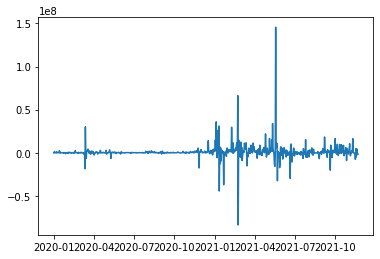

In [89]:
plt.plot(df.loc[pd.to_datetime("2020-01-01"):,"volume_net"])

In [28]:
df["volume_gross"] = df["volumeto"] + df["volumefrom_USD"]

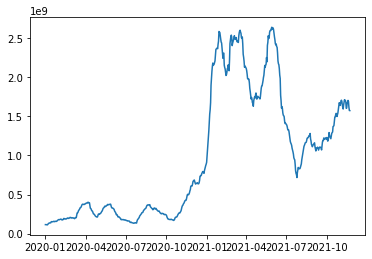

In [100]:
plt.plot(df.loc[pd.to_datetime("2020-01-01"):,"volume_gross_30"])

In [97]:
df["volume_gross_30"] = df["volume_gross"].rolling(30).mean()

In [29]:
df

,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,mean_price,volumefrom_USD,volume_net,volume_gross
time,,,,,,,,,,,,
2021-11-16,60107.98,63624.60,58638.00,63624.59,24904.46,1.514727e+09,force_direct,,61131.300,1.522442e+09,-7.714810e+06,3.037169e+09
2021-11-17,60351.51,60824.38,58380.00,60107.98,20904.28,1.250584e+09,force_direct,,59602.190,1.245941e+09,4.643191e+06,2.496525e+09
2021-11-18,56898.00,60977.21,56514.13,60351.51,26742.24,1.566051e+09,force_direct,,58745.670,1.570991e+09,-4.939710e+06,3.137042e+09
2021-11-19,58122.16,58412.12,55625.00,56898.00,18548.35,1.062148e+09,force_direct,,57018.560,1.057600e+09,4.548207e+06,2.119749e+09
2021-11-20,59760.76,59900.00,57423.35,58122.16,7582.40,4.448062e+08,force_direct,,58661.675,4.447963e+08,9.868630e+03,8.896024e+08
2021-11-21,58671.21,60070.00,58509.69,59760.76,6660.78,3.945169e+08,force_direct,,59289.845,3.949166e+08,-3.996892e+05,7.894335e+08
2021-11-22,56280.81,59526.51,55641.03,58671.21,15882.38,9.091499e+08,force_direct,,57583.770,9.145673e+08,-5.417400e+06,1.823717e+09
2021-11-23,57566.85,57886.03,55377.00,56280.81,14013.01,7.982513e+08,force_direct,,56631.515,7.935780e+08,4.673305e+06,1.591829e+09
2021-11-24,57162.66,57607.97,55875.01,57566.85,12507.17,7.089274e+08,force_direct,,56741.490,7.096755e+08,-7.480283e+05,1.418603e+09


In [31]:
df.to_csv("../raw_data/coinbase_2021_11.csv")